In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [63]:
data_iris = load_iris() 
df = pd.DataFrame(data_iris.data,columns=['a','b','c','d'])
df['e'] = 1
X_raw = data_iris.data
X = np.c_[np.ones((150,1)),X_raw]
y= np.array([0 if x == 0 else 1 for x in data_iris.target ])
y=np.reshape(y,(150,1))
obsv = len(y)
params = 5

In [64]:
def compute_ws(input_features,weights):
    return input_features@weights

def predict_probability(weighted_sum):
    return 1/(1+np.exp(-weighted_sum))

def predict_class(probability,threshold):
    y_hat_function = lambda x: 1 if x >=threshold else 0
    y_hat = [y_hat_function(x) for x in probability ]
    return y_hat

def cost_function(input_features,weights):
    ws = compute_ws(input_features,weights)
    p = predict_probability(ws)
    cost_function = ((-y.T@np.log(p))+((y-1).T@np.log(1-p)))/obsv
    cost_function_history.append(list(cost_function.flatten()))

def compute_Batch_GradientDescent(input_features,weights,y):
    ws = compute_ws(input_features,weights)
    p = predict_probability(ws)
    gradients = ((p-y).T@X)/obsv
    return gradients

def update_weights(gradients,learning_rate,weights):
    gradients = np.reshape(gradients,(5,1))
    weights -= learning_rate*gradients
    return weights

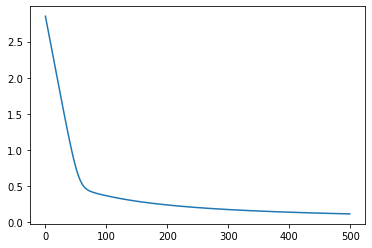

In [85]:
epoch = 500
cost_function_history = []
np.random.seed(42)
theta = np.random.rand(5,1)
for i in range(epoch):
    ws = compute_ws(X,theta)
    p = predict_probability(ws)
    y_hat = predict_class(p,0.5)
    cost_function(X,theta)
    gradients = compute_Batch_GradientDescent(X,theta,y)
    theta = update_weights(gradients,0.01,theta)
plt.plot(range(epoch),cost_function_history)
plt.show()